In [38]:
import torch
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'original data')

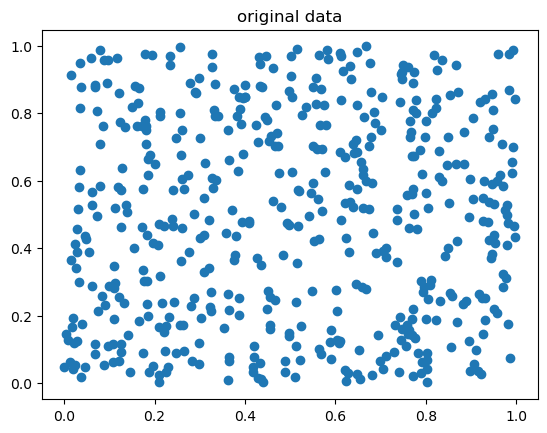

In [39]:
data = torch.rand((500, 2)) # num_samples x features (observations x rv)
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('original data')

Text(0.5, 1.0, 'mean transformed_data')

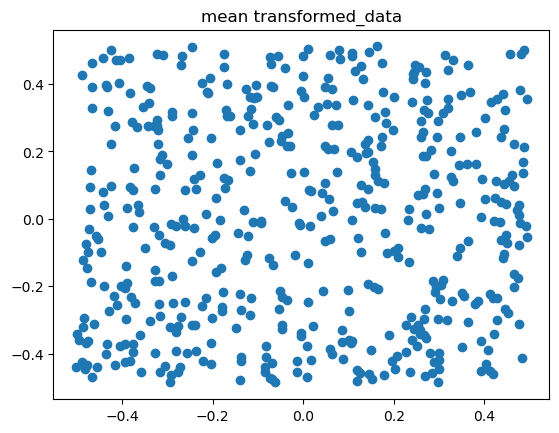

In [40]:
transformed_data = data - torch.mean(data, dim=0, keepdim=True)
plt.figure()
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('mean transformed_data')

In [49]:
covariance_matrix = torch.cov(transformed_data.T)
print(covariance_matrix)
eigvals, eigvectors = torch.linalg.eig(covariance_matrix)
eigvals, eigvectors = eigvals.real, eigvectors.real
print(torch.dist(eigvectors @ torch.diag_embed(eigvals) @ eigvectors.T, covariance_matrix))
eigvals = (1 / torch.sqrt(eigvals))

tensor([[0.0862, 0.0049],
        [0.0049, 0.0900]])
tensor(1.1349e-08)


Text(0.5, 1.0, 'pcawhitening')

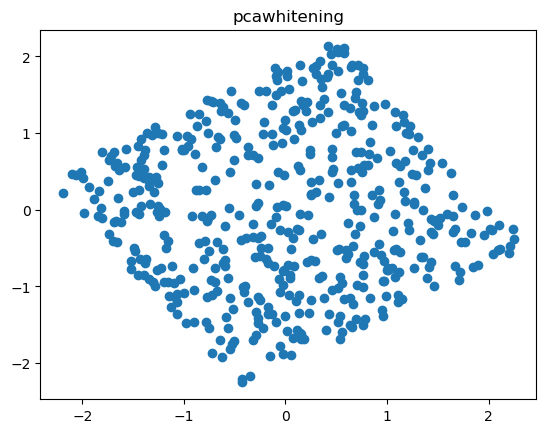

In [42]:
pcawhitening = (torch.diag(eigvals) @ eigvectors.T @ transformed_data.T).T
plt.figure()
plt.scatter(pcawhitening[:, 0], pcawhitening[:, 1])
plt.title('pcawhitening')

Text(0.5, 1.0, 'zcawhitening')

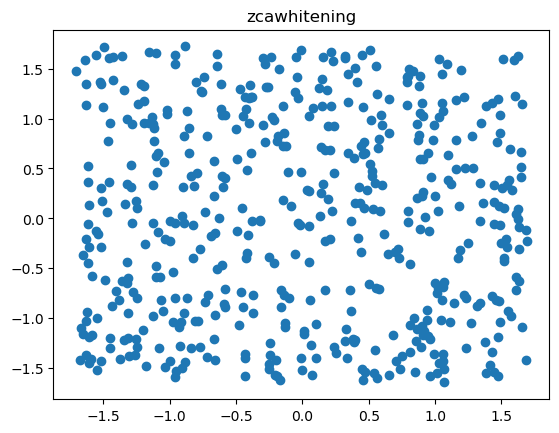

In [43]:
zcawhitening = (eigvectors @ torch.diag(eigvals) @ eigvectors.T @ transformed_data.T).T
plt.figure()
plt.scatter(zcawhitening[:, 0], zcawhitening[:, 1])
plt.title('zcawhitening')

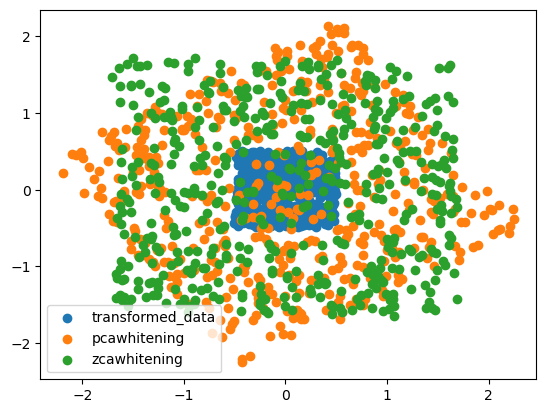

In [46]:
plt.figure()
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label='transformed_data')
plt.scatter(pcawhitening[:, 0], pcawhitening[:, 1], label='pcawhitening')
plt.scatter(zcawhitening[:, 0], zcawhitening[:, 1], label='zcawhitening')
plt.legend()

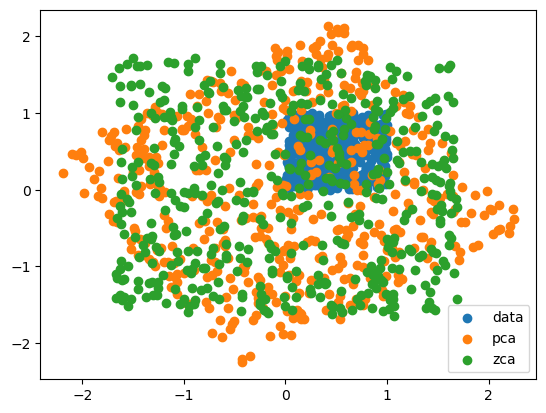

In [53]:
from data import whitening_transformation
pca, zca = transformed_data = whitening_transformation(data)
plt.figure()
plt.scatter(data[:, 0], data[:, 1], label='data')
plt.scatter(pca[:, 0], pca[:, 1], label='pca')
plt.scatter(zca[:, 0], zca[:, 1], label='zca')
plt.legend()